<a href="https://colab.research.google.com/github/AshutoshDhungana/hate_speech_NLP/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
path = '/content/drive/MyDrive/Dataset_colab/twitter_hate_speech.csv'
df = pd.read_csv(path)

In the given CSV the polarity has alrady been classfied in the dataset,
the polarity indicates the type of tweet it is Neutral, Positive or Negative

In this data set it is classified as follows:<br>
<br>
0 = negative, <br>
2 = neutral,  <br>
4 = positive

In [46]:
df.head()


,polarity,"""tweet_id""","""date""","""Query""","""username""","""text_of_tweet"""
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [47]:
df.tail()

,polarity,"""tweet_id""","""date""","""Query""","""username""","""text_of_tweet"""
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   polarity          1600000 non-null  int64 
 1    "tweet_id"       1600000 non-null  int64 
 2    "date"           1600000 non-null  object
 3    "Query"          1600000 non-null  object
 4    "username"       1600000 non-null  object
 5    "text_of_tweet"  1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [49]:
df.columns

Index(['polarity', ' "tweet_id"', ' "date"', ' "Query"', ' "username"',
       ' "text_of_tweet"'],
      dtype='object')

In [50]:
df[' "Query"'].value_counts("NO_QUERY")

,proportion
"""Query""",
NO_QUERY,1.0


The 'Query' column of the dataset seems to contains only the value "NO_QUERY", so we can delete that column.

In [51]:
df.drop(columns = [' "Query"'], inplace = True)

In [52]:
df.head()

,polarity,"""tweet_id""","""date""","""username""","""text_of_tweet"""
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."


The username, date and the tweet_id are also something we dont require so we can eliminate those column too

In [53]:
df.drop(columns = [' "username"'], inplace = True)

In [54]:
df.drop(columns = [' "date"'], inplace = True)

In [55]:
df.drop(columns = [' "tweet_id"'], inplace = True)

In [56]:
df.head()

,polarity,"""text_of_tweet"""
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


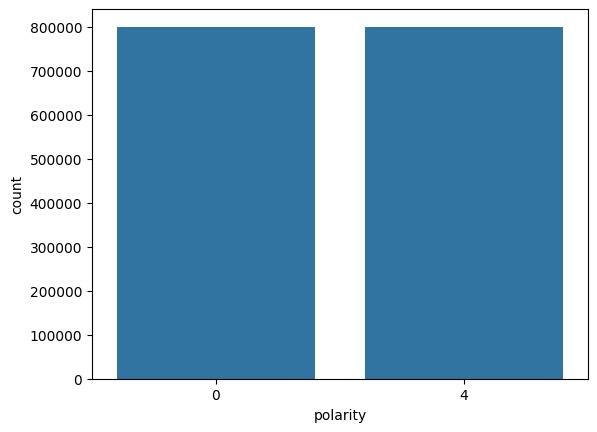

In [57]:
sns.countplot(x = df['polarity'])
plt.show()

From the above histogram we can see that there are tweets of either Negative or Positive tweets, without any Neutral tweets

Splitting the dataset into test and train sets


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(df[' "text_of_tweet"'], df['polarity'], test_size = 0.2, random_state = 42)


In [60]:
print(f"Training set size: {x_train.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")

Training set size: 1280000
Test set size: 320000


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


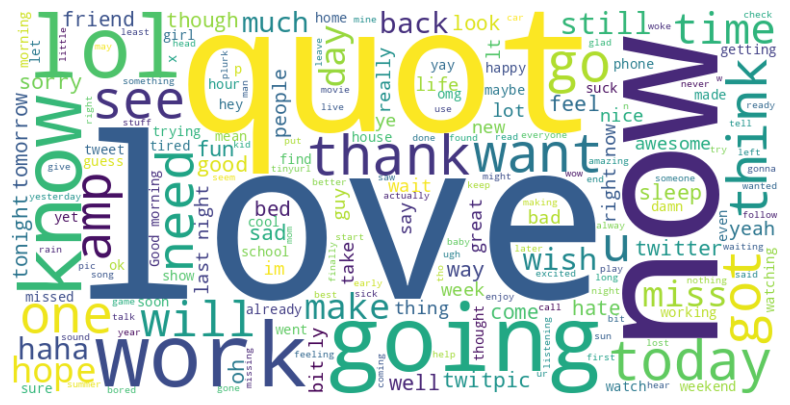

In [62]:
# prompt: check for the most commonly used words in the  "text_of_tweet", using the nltk library as a word cloud image, without eliminating the stop words or punctuations

from wordcloud import WordCloud
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


# Combine all tweets into a single string
text = " ".join(df[' "text_of_tweet"'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


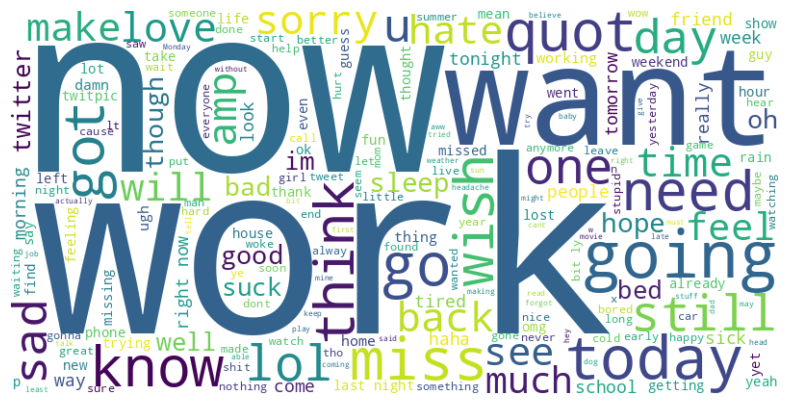

In [63]:
# prompt: now create the word cloud for the "text_of_tweet"' with the polarity 0, without editing out the stop words and punctuations

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter tweets with polarity 0
negative_tweets = df[df['polarity'] == 0][' "text_of_tweet"'].astype(str)

# Combine negative tweets into a single string
negative_text = " ".join(negative_tweets)

# Generate the word cloud
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.show()


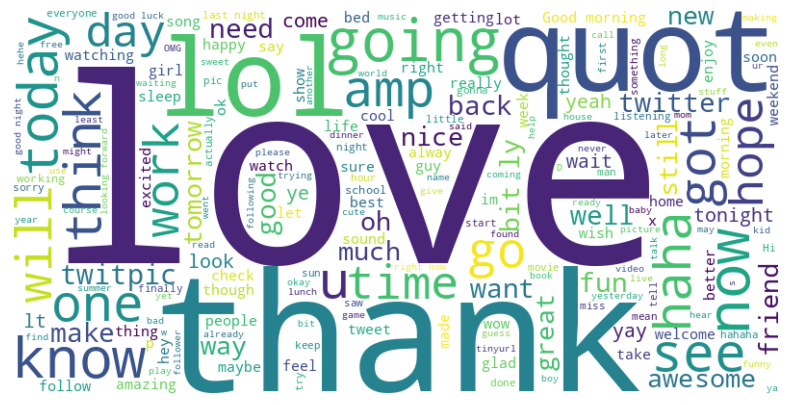

In [64]:
# prompt: now create the word cloud for the "text_of_tweet"' with the polarity 4, without editing out the stop words and punctuations

# Filter tweets with polarity 4
positive_tweets = df[df['polarity'] == 4][' "text_of_tweet"'].astype(str)

# Combine positive tweets into a single string
positive_text = " ".join(positive_tweets)

# Generate the word cloud without removing stop words and punctuations
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.show()


In [65]:
# prompt: clean the data set off of the stop words, any type of punctuations, and symbols, and turn the data into a bunch of lower case letters

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

def clean_tweet(tweet):
  """
  Cleans a tweet by removing stop words, punctuation, and symbols, and converting to lowercase.
  """
  tweet = tweet.lower()
  tweet = ''.join([char for char in tweet if char not in string.punctuation])
  tokens = word_tokenize(tweet)
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word not in stop_words]
  cleaned_tweet = ' '.join(filtered_tokens)
  return cleaned_tweet

# Apply the clean_tweet function to the "text_of_tweet" column
df[' "text_of_tweet"'] = df[' "text_of_tweet"'].astype(str).apply(clean_tweet)

# Print the updated DataFrame
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,polarity,"""text_of_tweet"""
0,0,switchfoot httptwitpiccom2y1zl awww thats bumm...
1,0,upset cant update facebook texting might cry r...
2,0,kenichan dived many times ball managed save 50...
3,0,whole body feels itchy like fire
4,0,nationwideclass behaving im mad cant see
